In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/small-service-use-data-set/Anonymized_Service_Use.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/small-service-use-data-set/Anonymized_Service_Use.xlsx')
df.head()

,Customer,Service,Domain,Package,Customer Region,Customer Size Revenue,Customer Size Employees,Likelihood to Recommend Score
0,Customer 1,Service 1,Consultations,Organizational Performance,California,14M-36M,300-500,9
1,Customer 1,Service 2,Consultations,Organizational Performance,California,14M-36M,300-500,10
2,Customer 2,Service 2,Consultations,Organizational Performance,Appalachia,14M-36M,Less than 300,10
3,Customer 3,Service 3,Vendors and Discounts,Brand Activation,Midwest,14M-36M,300-500,7
4,Customer 4,Service 3,Vendors and Discounts,Brand Activation,Southeast,Greater than 111M,Greater than 1300,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer                       3572 non-null   object
 1   Service                        3572 non-null   object
 2   Domain                         3572 non-null   object
 3   Package                        3572 non-null   object
 4   Customer Region                3572 non-null   object
 5   Customer Size Revenue          3572 non-null   object
 6   Customer Size Employees        3572 non-null   object
 7   Likelihood to Recommend Score  3572 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 223.4+ KB


In [4]:
## Creating a new dataframe to visualize mean recommedation score and count of scores by Service since we will be 
## using those in the recommendation system
scores_mean_count = pd.DataFrame(df.groupby('Service')['Likelihood to Recommend Score'].mean())
scores_mean_count['score_counts'] = pd.DataFrame(df.groupby('Service')['Likelihood to Recommend Score'].count())
scores_mean_count.head()

,Likelihood to Recommend Score,score_counts
Service,,
Service 1,9.000000,1
Service 10,5.548387,31
Service 11,6.500000,2
Service 12,6.476190,21
Service 13,6.437500,16


<Axes: >

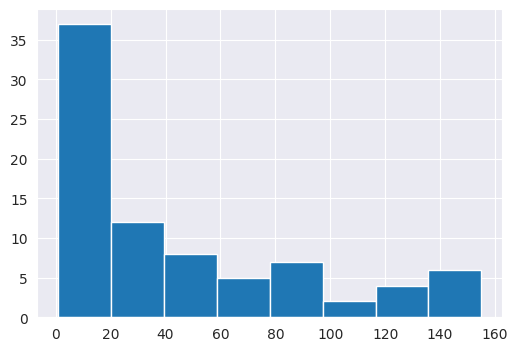

In [5]:
## Creating a Histogram to look at the number of scores for each Service

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(6,4))
plt.rcParams['patch.force_edgecolor'] = True
scores_mean_count['score_counts'].hist(bins=8)

<Axes: >

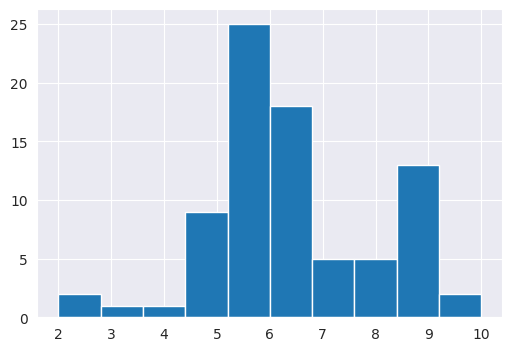

In [6]:
## Also looking at average scores per Service

plt.figure(figsize=(6,4))
plt.rcParams['patch.force_edgecolor'] = True
scores_mean_count['Likelihood to Recommend Score'].hist(bins=10)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 400x200 with 0 Axes>

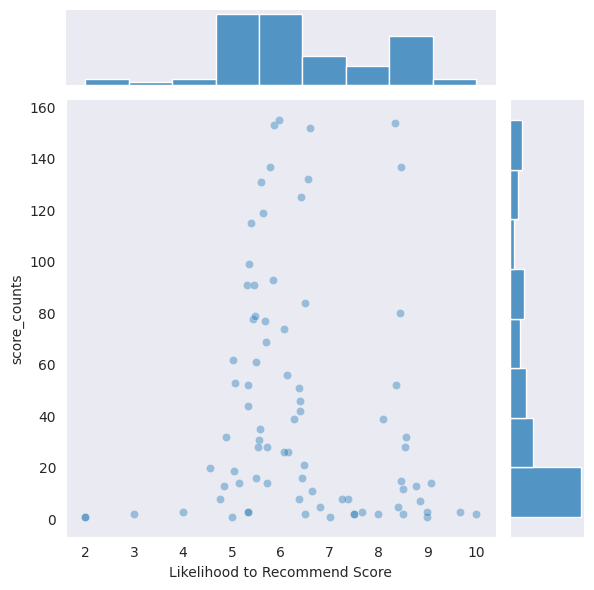

In [7]:
## Creating a scatterplot to look at the average scores against the number of scores

plt.figure(figsize=(4,2))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Likelihood to Recommend Score', y='score_counts', data=scores_mean_count, alpha=0.4)

            Likelihood to Recommend Score  score_counts
Service                                                
Service 1                        9.000000             1
Service 11                       6.500000             2
Service 17                       8.500000             2
Service 2                       10.000000             2
Service 29                       7.000000             1
Service 30                       8.000000             2
Service 34                       7.500000             2
Service 43                       5.333333             3
Service 48                       8.400000             5
Service 54                       9.000000             3
Service 56                       2.000000             1
Service 58                       3.000000             2
Service 60                       4.000000             3
Service 62                       7.500000             2
Service 68                       2.000000             1
Service 72                       9.666667       

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 400x200 with 0 Axes>

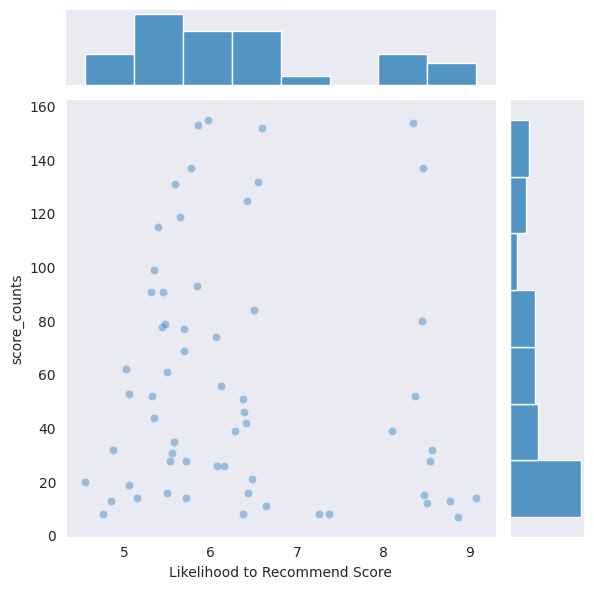

In [8]:
#we should remove the services that don't have a lot scores from the data, as there is probably not enough data to determine
#whether or not they should be recommended, and also that is where we are seeing the outlier low scores.

# Use boolean indexing to extract the names services with score count lower than or equal to 5
result = scores_mean_count.loc[scores_mean_count['score_counts'] <= 5]

print(result)

scores_mean_count_clean = scores_mean_count[scores_mean_count.score_counts > 5]


#look at that scatterplot for the cleaned data
plt.figure(figsize=(4,2))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Likelihood to Recommend Score', y='score_counts', data=scores_mean_count_clean, alpha=0.4)

In [9]:
#creating a new clean dataframe to work with
df_clean = df[df.Service != "Service 1"]
df_clean = df_clean[df_clean.Service != "Service 11"]
df_clean = df_clean[df_clean.Service != "Service 17"]
df_clean = df_clean[df_clean.Service != "Service 2"]
df_clean = df_clean[df_clean.Service != "Service 29"]
df_clean = df_clean[df_clean.Service != "Service 30"]
df_clean = df_clean[df_clean.Service != "Service 34"]
df_clean = df_clean[df_clean.Service != "Service 43"]
df_clean = df_clean[df_clean.Service != "Service 48"]
df_clean = df_clean[df_clean.Service != "Service 54"]
df_clean = df_clean[df_clean.Service != "Service 56"]
df_clean = df_clean[df_clean.Service != "Service 58"]
df_clean = df_clean[df_clean.Service != "Service 60"]
df_clean = df_clean[df_clean.Service != "Service 62"]
df_clean = df_clean[df_clean.Service != "Service 68"]
df_clean = df_clean[df_clean.Service != "Service 72"]
df_clean = df_clean[df_clean.Service != "Service 76"]
df_clean = df_clean[df_clean.Service != "Service 78"]
df_clean = df_clean[df_clean.Service != "Service 79"]
df_clean = df_clean[df_clean.Service != "Service 80"]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3525 entries, 3 to 3571
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer                       3525 non-null   object
 1   Service                        3525 non-null   object
 2   Domain                         3525 non-null   object
 3   Package                        3525 non-null   object
 4   Customer Region                3525 non-null   object
 5   Customer Size Revenue          3525 non-null   object
 6   Customer Size Employees        3525 non-null   object
 7   Likelihood to Recommend Score  3525 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 247.9+ KB


<Axes: >

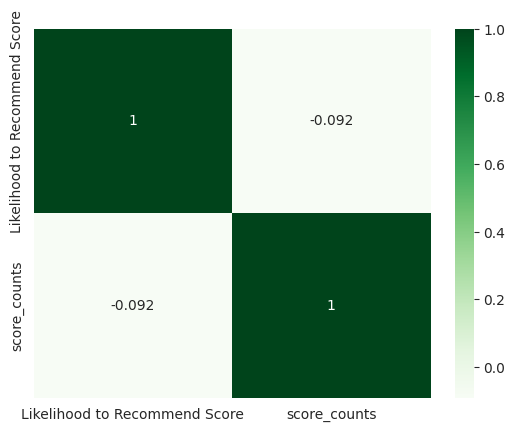

In [10]:
# For awareness, let's look at the correlation matrix in the cleaned dataframe

matrix = scores_mean_count_clean.corr()

#plotting correlation matrix 
sns.heatmap(matrix, cmap="Greens", annot=True)

In [11]:
#create a matrix to house the recommendation scores given to services by customers
customer_service_score = df_clean.pivot_table(index='Customer', columns='Service', values='Likelihood to Recommend Score')
customer_service_score.head()

Service,Service 10,Service 12,Service 13,Service 14,Service 15,Service 16,Service 18,Service 19,Service 20,Service 21,...,Service 7,Service 70,Service 71,Service 73,Service 74,Service 75,Service 77,Service 8,Service 81,Service 9
Customer,,,,,,,,,,,,,,,,,,,,,
Customer 1,NaN,NaN,NaN,NaN,7.0,7.0,5.0,NaN,3.0,7.0,...,6.0,NaN,NaN,8.0,NaN,NaN,3.0,4.0,NaN,NaN
Customer 10,10.0,NaN,NaN,5.0,6.0,NaN,6.0,NaN,9.0,NaN,...,2.0,6.0,NaN,9.0,NaN,NaN,NaN,NaN,6.0,NaN
Customer 100,NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,7.0,2.0,...,2.0,NaN,NaN,7.0,NaN,1.0,6.0,NaN,NaN,7.0
Customer 101,NaN,NaN,NaN,NaN,7.0,NaN,8.0,NaN,NaN,NaN,...,2.0,6.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
Customer 102,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,4.0,8.0,NaN,8.0,NaN,7.0,1.0,NaN,NaN,NaN


In [12]:
#recommend services that are like service 5

service_five_ratings = customer_service_score['Service 5']
services_like_five = customer_service_score.corrwith(service_five_ratings)

corr_service_five = pd.DataFrame(services_like_five, columns=['Correlation'])
corr_service_five.dropna(inplace=True)

corr_service_five.sort_values('Correlation', ascending=False).head(5)

,Correlation
Service,
Service 5,1.000000
Service 41,0.513405
Service 19,0.440670
Service 14,0.372678
Service 31,0.364698


In [13]:
#importing surprise and the packages that we might use

!pip install surprise
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline

In [14]:
#moving forward, we really only want the customer, Service and Likelihood to Recommend columns from the data, let's drop the rest
df_clean.drop(['Domain', 'Package', 'Customer Region', 'Customer Size Revenue', 'Customer Size Employees'], axis=1, inplace=True)
df_clean.head()

,Customer,Service,Likelihood to Recommend Score
3,Customer 3,Service 3,7
4,Customer 4,Service 3,8
5,Customer 5,Service 3,6
6,Customer 6,Service 3,5
7,Customer 7,Service 3,7


In [15]:
from sklearn.model_selection import train_test_split

#reading data into format that Surprise likes
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_clean[['Customer', 'Service', 'Likelihood to Recommend Score']], reader)

#make test and train data
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

#specify that we want to use the KNN basic algorithm
sim_options = {
    "name": "cosine",
    "user_based": False,  # compute  similarities between items
}
algo = KNNBasic(sim_options=sim_options)

#make predictions and return the RMSE for the model
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5576


0.5576103207627805

In [16]:
benchmark = []

# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline(), KNNBasic()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    algorithm_name = str(algorithm).split(' ')[0].split('.')[-1]
    tmp = pd.concat([tmp, pd.Series([algorithm_name], index=['Algorithm'])])
    benchmark.append(tmp)
    
# Create DataFrame from benchmark results and sort by test_rmse
benchmark_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

print(benchmark_df)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
             test_rmse  fit_time  test_time
Algorithm                                  
KNNBaseline   2.230029  0.006854   0.226934
KNNBasic      2.231394  0.003750   0.170677
SVD           2.272190  0.031651   0.010284


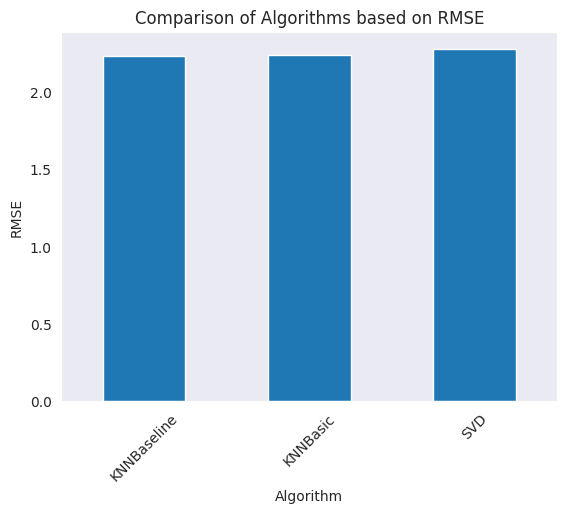

In [17]:
# Plot the bar chart
benchmark_df.plot(kind='bar', y='test_rmse', legend=None)
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.title('Comparison of Algorithms based on RMSE')
plt.xticks(rotation=45)
plt.show()

In [18]:
#Look for the best value of K using the KNNBasic algorithm

# Define a range of values for k
k_values = [5, 10, 20, 30, 40]

# Dictionary to store RMSE for each k
rmse_scores = {}

# Iterate through each k value
for k in k_values:
    # Create a KNNBasic model with the current k value
    algo = KNNBasic(k=k, sim_options={'name': 'pearson', 'user_based': True})

    # Perform cross-validation
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

    # Calculate average RMSE
    avg_rmse = np.mean(results['test_rmse'])

    # Store the RMSE score
    rmse_scores[k] = avg_rmse

# Find the k value with the lowest RMSE
best_k = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_k]

print("Best k:", best_k)
print("RMSE with best k:", best_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

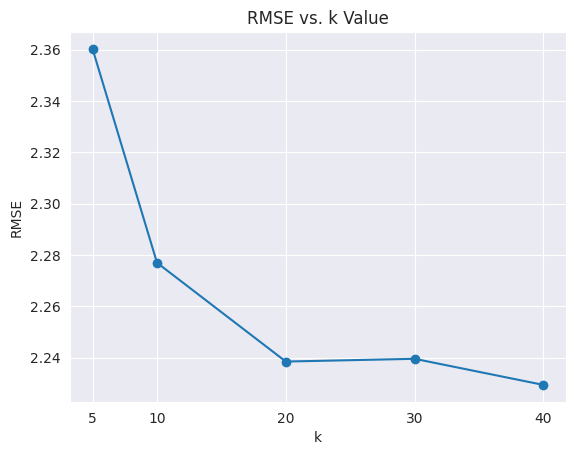

In [19]:
#make a plot of those results

# Plot RMSE scores for different k values
plt.plot(list(rmse_scores.keys()), list(rmse_scores.values()), marker='o')
plt.title('RMSE vs. k Value')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.xticks(list(rmse_scores.keys()))
plt.grid(True)
plt.show()